# STEP 1: Load the Dataset 
#### In this step, the historical cryptocurrency dataset is loaded and basic inspection is performed to understand its structure and features.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

- pandas: data handling

- numpy: numerical operations

- matplotlib & seaborn: visualization (required for EDA)

In [15]:
import zipfile, os

zip_path = os.path.join("..", "data", "dataset.csv.zip")
extract_path = os.path.join("..", "data")

import os
if not os.path.exists(os.path.join(extract_path, "dataset.csv")):
    with zipfile.ZipFile(zip_path, "r") as zip_ref:
        zip_ref.extractall(extract_path)


In [16]:
# Relative path from notebook to data folder
dataset_path = os.path.join("..", "data", "dataset.csv")


In [17]:
# Load CSV into df
df = pd.read_csv(dataset_path)
# Show first 5 rows
df.head()


,Unnamed: 0,open,high,low,close,volume,marketCap,timestamp,crypto_name,date
0,0,112.900002,118.800003,107.142998,115.910004,0.0,1.288693e+09,2013-05-05T23:59:59.999Z,Bitcoin,2013-05-05
1,1,3.493130,3.692460,3.346060,3.590890,0.0,6.229819e+07,2013-05-05T23:59:59.999Z,Litecoin,2013-05-05
2,2,115.980003,124.663002,106.639999,112.300003,0.0,1.249023e+09,2013-05-06T23:59:59.999Z,Bitcoin,2013-05-06
3,3,3.594220,3.781020,3.116020,3.371250,0.0,5.859436e+07,2013-05-06T23:59:59.999Z,Litecoin,2013-05-06
4,4,112.250000,113.444000,97.699997,111.500000,0.0,1.240594e+09,2013-05-07T23:59:59.999Z,Bitcoin,2013-05-07


In [18]:
df.shape

(72946, 10)

Explanation:
- Shows number of rows and columns

In [19]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72946 entries, 0 to 72945
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   72946 non-null  int64  
 1   open         72946 non-null  float64
 2   high         72946 non-null  float64
 3   low          72946 non-null  float64
 4   close        72946 non-null  float64
 5   volume       72946 non-null  float64
 6   marketCap    72946 non-null  float64
 7   timestamp    72946 non-null  object 
 8   crypto_name  72946 non-null  object 
 9   date         72946 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 5.6+ MB
None


# Step 2: Filter One Cryptocurrency (Bitcoin)

Since this is a first-level implementation, the scope is reduced to a single cryptocurrency (Bitcoin) to ensure clarity, stability, and easier interpretation of volatility patterns.

In [20]:
# Show all available crytocurrencies
df['crypto_name'].unique()

array(['Bitcoin', 'Litecoin', 'XRP', 'Dogecoin', 'Monero', 'Stellar',
       'Tether', 'Ethereum', 'Ethereum Classic', 'Maker',
       'Basic Attention Token', 'EOS', 'Bitcoin Cash', 'BNB', 'TRON',
       'Decentraland', 'Chainlink', 'Cardano', 'Filecoin',
       'Theta Network', 'Huobi Token', 'Ravencoin', 'Tezos', 'VeChain',
       'Quant', 'USD Coin', 'Cronos', 'Wrapped Bitcoin', 'Cosmos',
       'Polygon', 'OKB', 'UNUS SED LEO', 'Algorand', 'Chiliz',
       'THORChain', 'Terra Classic', 'FTX Token', 'Hedera', 'Binance USD',
       'Dai', 'Solana', 'Avalanche', 'Shiba Inu', 'The Sandbox',
       'Polkadot', 'Elrond', 'Uniswap', 'Aave', 'NEAR Protocol', 'Flow',
       'Internet Computer', 'Casper', 'Toncoin', 'Chain', 'ApeCoin',
       'Aptos'], dtype=object)

In [21]:
btc_df = df[df['crypto_name'] == 'Bitcoin'].copy()

- Filters only Bitcoin data

In [22]:
btc_df.shape

(3248, 10)

In [23]:
btc_df.head()

,Unnamed: 0,open,high,low,close,volume,marketCap,timestamp,crypto_name,date
0,0,112.900002,118.800003,107.142998,115.910004,0.0,1.288693e+09,2013-05-05T23:59:59.999Z,Bitcoin,2013-05-05
2,2,115.980003,124.663002,106.639999,112.300003,0.0,1.249023e+09,2013-05-06T23:59:59.999Z,Bitcoin,2013-05-06
4,4,112.250000,113.444000,97.699997,111.500000,0.0,1.240594e+09,2013-05-07T23:59:59.999Z,Bitcoin,2013-05-07
7,7,109.599998,115.779999,109.599998,113.566002,0.0,1.264049e+09,2013-05-08T23:59:59.999Z,Bitcoin,2013-05-08
9,9,113.199997,113.459999,109.260002,112.669998,0.0,1.254535e+09,2013-05-09T23:59:59.999Z,Bitcoin,2013-05-09


- Shows how many records Bitcoin has

# Step 3: Data Cleaning

### 3.1 Drop Unnecessary Columns

In [24]:
btc_df.drop(columns=['Unnamed: 0'], inplace= True, errors= 'ignore')

The index-like column does not contribute to prediction and is removed to reduce noise

### 3.2 Convert Date to Datetime format

- Required for time-series analysis

In [25]:
btc_df['date'] = pd.to_datetime(btc_df['date'])

### 3.3 Sort Data by Date

In [26]:
btc_df.sort_values('date', inplace=True)
btc_df.reset_index(drop=True, inplace=True)

Explanation:
- Time-series models requires chronological order

- Reset index after sorting

### 3.4 Check / Handle Missing Values

In [27]:
btc_df.isnull().sum()

open           0
high           0
low            0
close          0
volume         0
marketCap      0
timestamp      0
crypto_name    0
date           0
dtype: int64

Null values do not exist in any column

### 3.5 Remove Zero-Volume Rows

In [28]:
btc_df = btc_df[btc_df['volume'] > 0].copy()

Explanation:
- Zero volume implies no trading activity
- Such rows distort volatility calculations

### Final Check

In [29]:
btc_df.describe()

,open,high,low,close,volume,marketCap,date
count,3012.000000,3012.000000,3012.000000,3012.000000,3.012000e+03,3.012000e+03,3012
mean,10421.626872,10695.669593,10121.682356,10434.506530,1.340915e+10,1.914889e+11,2018-02-16 17:24:08.605577728
min,176.897003,211.731003,171.509995,178.102997,2.857830e+06,2.444379e+09,2013-12-27 00:00:00
25%,576.044983,583.432526,565.738983,576.183487,5.565122e+07,7.671167e+09,2016-01-18 18:00:00
50%,4510.564922,4628.080010,4348.054941,4572.034912,4.142622e+09,7.577315e+10,2018-02-09 12:00:00
75%,10216.254082,10425.330742,9945.501451,10233.674805,2.313271e+10,1.827981e+11,2020-03-05 06:00:00
max,67549.735581,68789.625939,66382.061008,67566.830088,3.509679e+11,1.274831e+12,2022-10-23 00:00:00
std,15389.343419,15792.437153,14929.099509,15397.911431,1.926568e+10,2.904512e+11,NaN


Explanation:

- .describe() gives Statistical summary

- Final Check is done to confirm data cleanliness

# Step 4: Volatility Calculation (CORE OF THE PROJECT)

### 4.1 Why to calculate Volatility?

- Volatility is not directly available in the dataset; it is computed using historical price movements. In this project, volatility is defined as the rolling standard deviation of daily log returns, which is a commonly used measure in financial time-series analysis.

### 4.2 Calculate Daily Returns

In [30]:
btc_df['log_return'] = np.log(btc_df['close'] / btc_df['close'].shift(1))

Explanation:
- Measures percentage price change

- Log returns are preferred in finance due to stability

- First row becomes NaN

### 4.3 Calculate Rolling Volatility (Target Variable)

In [31]:
btc_df['volatility'] = btc_df['log_return'].rolling(7).std()

# Predict NEXT day volatility
btc_df['target_volatility'] = btc_df['volatility'].shift(-1)


Explanation:

- Rolling standard deviation = volatility

- This column is the target variable (y)

# Step 5: Feature Engineering

### 5.1 Need to perform Feature Engineering:

Raw OHLC data alone does not sufficiently capture market dynamics. Therefore, additional features related to price movement, trend, and liquidity are engineered to improve volatility prediction.

### 5.2 Create Price-Based Features

In [32]:
btc_df['abs_return'] = btc_df['log_return'].abs()

In [33]:
btc_df['high_low'] = btc_df['high'] - btc_df['low']


### 5.3 Liquidity Feature

In [34]:
btc_df['liquidity_ratio'] = btc_df['volume'] / btc_df['marketCap']

In [35]:
for lag in [1, 3, 7, 14]:
    btc_df[f'volatility_lag_{lag}'] = btc_df['volatility'].shift(lag)
    

Final Cleaning after all features

In [36]:

btc_df.dropna(inplace= True)

# Step 6 Exploratory Data Analysis (EDA)

### 6.1 Price Trend

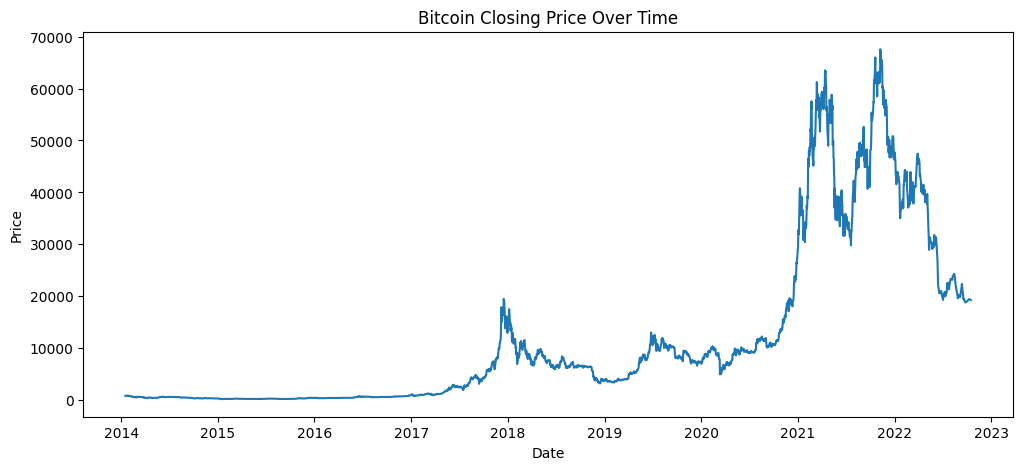

In [37]:
plt.figure(figsize=(12, 5))
plt.plot(btc_df['date'], btc_df['close'])
plt.title("Bitcoin Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

### 6.2 Volatility Trend

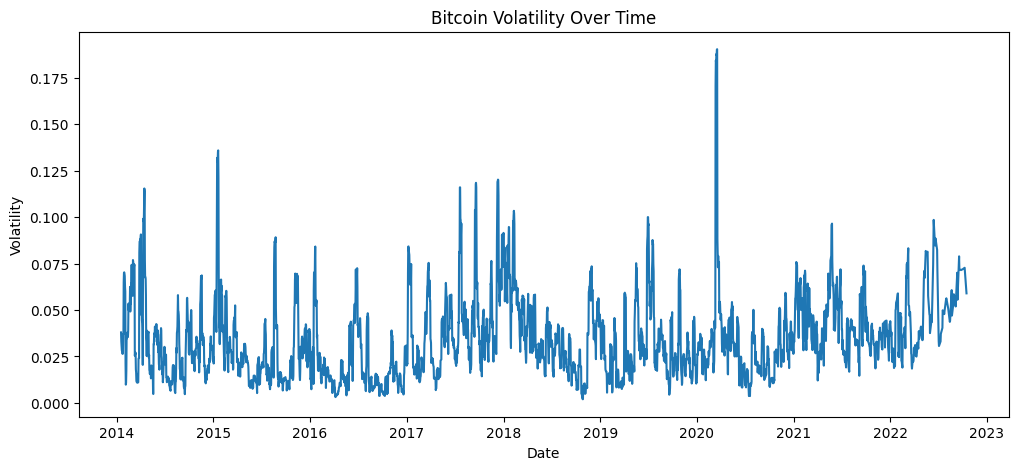

In [38]:
plt.figure(figsize=(12,5))
plt.plot(btc_df['date'], btc_df['volatility'])
plt.title("Bitcoin Volatility Over Time")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.show()


### 6.3 Correlation Heatmap

In [39]:
import seaborn as sns

In [40]:
btc_df.dtypes


open                        float64
high                        float64
low                         float64
close                       float64
volume                      float64
marketCap                   float64
timestamp                    object
crypto_name                  object
date                 datetime64[ns]
log_return                  float64
volatility                  float64
target_volatility           float64
abs_return                  float64
high_low                    float64
liquidity_ratio             float64
volatility_lag_1            float64
volatility_lag_3            float64
volatility_lag_7            float64
volatility_lag_14           float64
dtype: object

In [41]:
corr = btc_df.select_dtypes(include='number').corr()

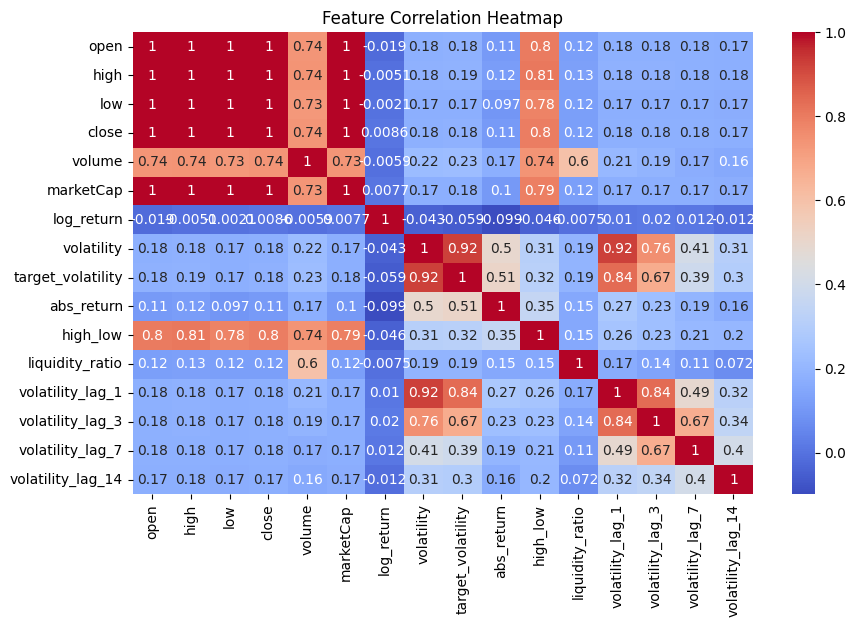

In [42]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.title("Feature Correlation Heatmap")
plt.show()


# Step 7: Data Preperation for Modeling

### 7.1 Selecting Features & Target

In [43]:
features = [
    'volatility_lag_1',
    'volatility_lag_3',
    'volatility_lag_7',
    'volatility_lag_14',
    'abs_return',
    'liquidity_ratio',
    'high_low'
]

X = btc_df[features]
Y = btc_df['target_volatility']


In [44]:
print("NaNs in X:", X.isna().sum().sum())
print("NaNs in Y:", Y.isna().sum())


NaNs in X: 0
NaNs in Y: 0


### 7.2 Train-Test Split (Time-Based)

Train-Test split for model 1

In [45]:
split_index = int(len(btc_df) * 0.8)

X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
Y_train, Y_test = Y.iloc[:split_index], Y.iloc[split_index:]


Explanation:

- Splitting the data into train and test dataset

# Step 8: Modeling

In [46]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(
    n_estimators=400,
    max_depth=6,
    min_samples_leaf=20,
    min_samples_split=40,
    random_state=42,
    n_jobs=-1
)

model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)


### Why Random Forest?

- Random Forest Regression is selected due to its ability to model non-linear relationships, robustness to noise, and minimal parameter tuning requirements.

# Step 9: Model Evaluation

In [47]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

print("Train RMSE:",
      np.sqrt(mean_squared_error(Y_train, model.predict(X_train))))

print("Test RMSE:",
      np.sqrt(mean_squared_error(Y_test, Y_pred)))


Train RMSE: 0.009922948462814421
Test RMSE: 0.00945134622718259


Key observation

- Test RMSE is slightly lower than Train RMSE

- The model learned robust signal, not noise

- No memorization of the training data

- Stable behavior on unseen data

In [48]:
from sklearn.metrics import mean_absolute_error, r2_score

print("Test MAE:", mean_absolute_error(Y_test, Y_pred))
print("Test R2:", r2_score(Y_test, Y_pred))


Test MAE: 0.006634720992058934
Test R2: 0.696991085366236


### NAIVE BASELINE

In [49]:
Y_naive = X_test['volatility_lag_1']

print("Naive RMSE:",
      np.sqrt(mean_squared_error(Y_test, Y_naive)))


Naive RMSE: 0.011371648768529898


##

# Step 10: Visualization

### Feature Importance

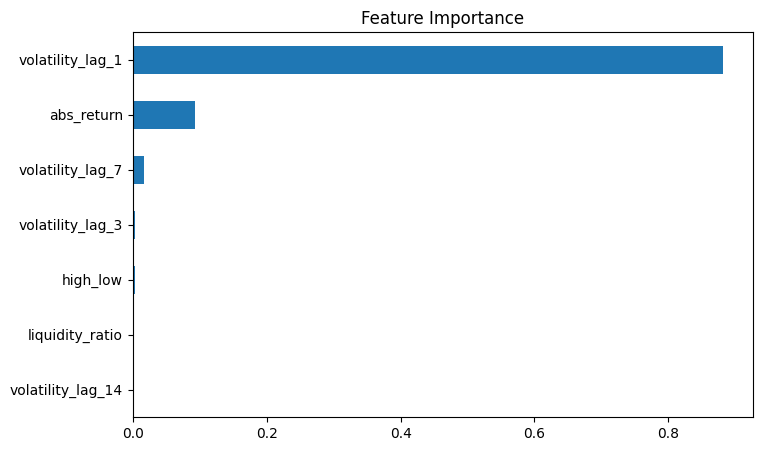

In [50]:
importances = pd.Series(
    model.feature_importances_,
    index=features
).sort_values()

importances.plot(kind='barh', figsize=(8,5))
plt.title("Feature Importance")
plt.show()


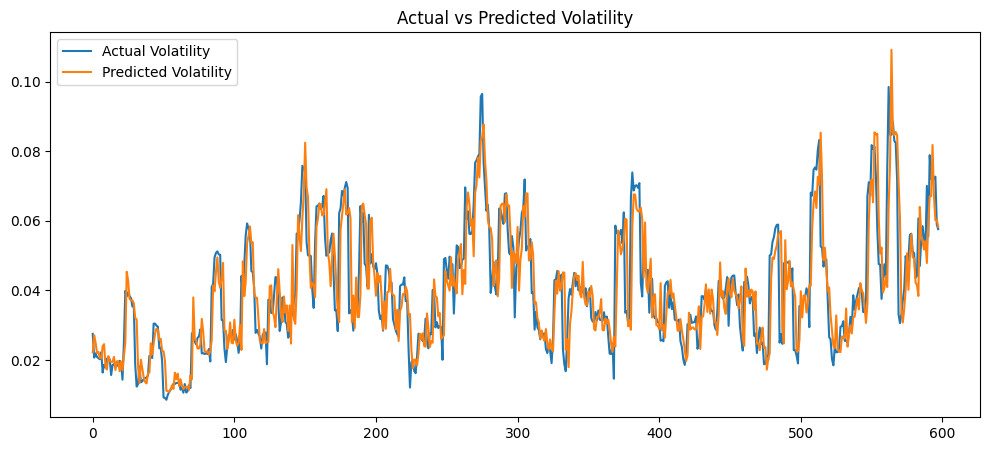

In [51]:
plt.figure(figsize=(12, 5))
plt.plot(Y_test.values, label = 'Actual Volatility')
plt.plot(Y_pred, label='Predicted Volatility')
plt.legend()
plt.title("Actual vs Predicted Volatility")
plt.show()

# Step 11: Model Optimization

### 11.1 Hyperparameter Tuning

In [52]:
# Model-2: Slightly deeper forest for COMPARISON.
rf_tuned = RandomForestRegressor(
    n_estimators=600,
    max_depth=8,
    min_samples_leaf=15,
    random_state=42,
    n_jobs=-1
)

rf_tuned.fit(X_train, Y_train)
Y_pred_tuned = rf_tuned.predict(X_test)

print("Tune Test RMSE:", np.sqrt(mean_squared_error(Y_test, Y_pred_tuned)))

Tune Test RMSE: 0.009362931741549854
